In [17]:
#make average Trx for all receotors for LSB by fitting obsevation data with polinominal functions  
#used data come from '2018-01-04' to '2018-09-04'
#receptor H01,02,03,04,05,06,07,08,09,10,11,12,15

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math
from scipy.interpolate import *
%matplotlib inline

In [19]:
X= ['02','03','04','05','06','07','08','09','10','11','12','15'] #receptor number of H it start from 0

H1=pd.read_csv('/export/data/imizuno/Python_Analysis/wvmmatched/wvmmatched_H01LSB.txt', index_col=0)
H1['recep']='H01'  #H00 doesn't use since it's not working now

for i in np.arange(12):

    HX=pd.read_csv('/export/data/imizuno/Python_Analysis/wvmmatched/wvmmatched_H'+ X[i] + 'LSB.txt', index_col=0)

    HX['recep']='H'+X[i]

    H1=H1.append(HX)


In [20]:
list(H1)

['utdate',
 'obsnum',
 'subsysnr',
 'lofreq',
 'iffreq',
 'rffreq',
 'time',
 'trx',
 'tsys',
 'utc',
 'utc_rough',
 'tau225',
 'airmass',
 'azimuth',
 'taurffreq',
 'recep']

In [21]:
HLSB=H1

Text(0.5,0,'Lo frequency (GHx)')

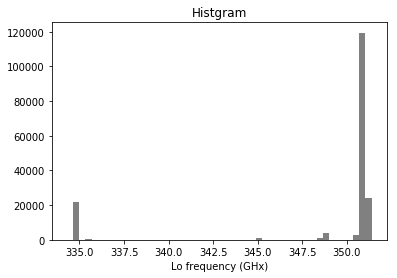

In [22]:
plt.hist(HLSB.lofreq,bins=50, color='grey')
plt.title("Histgram")
plt.xlabel("Lo frequency (GHx)")
#plt.xlabel("Sky frequency (GHz)")

Text(0,0.5,'Trx (K)')

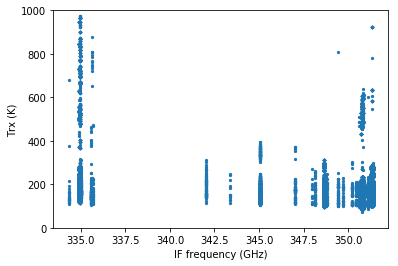

In [23]:
plt.scatter(HLSB.lofreq, HLSB.trx, s=5)
plt.ylim(0,1000)
plt.xlabel("IF frequency (GHz)")
plt.ylabel("Trx (K)")

In [24]:
p1=np.polyfit(HLSB.lofreq, HLSB.trx, 1); print("p1=",p1)
p2=np.polyfit(HLSB.lofreq, HLSB.trx, 2); print("p2=",p2)
p3=np.polyfit(HLSB.lofreq, HLSB.trx, 3); print("p3=",p3)
p4=np.polyfit(HLSB.lofreq, HLSB.trx, 4); print("p4=",p4)

p1= [  -3.15935606 1257.26845007]
p2= [ 1.02905000e-01 -7.37409445e+01  1.33537122e+04]
p3= [ 1.81288394e-01 -1.87226834e+02  6.44375868e+04 -7.39046397e+06]
p4= [ 4.06872970e-02 -5.59485768e+01  2.88471545e+04 -6.60977725e+06
  5.67877227e+08]


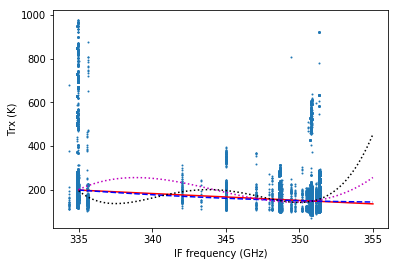

In [25]:
plt.plot(HLSB.lofreq, HLSB.trx,'o', markersize=1)
xp=np.linspace(335, 355, 100)
plt.xlabel("IF frequency (GHz)")
plt.ylabel("Trx (K)")
plt.plot(xp, np.polyval(p1, xp),'r-')
plt.plot(xp, np.polyval(p2, xp),'b--')
plt.plot(xp, np.polyval(p3, xp),'m:')
plt.plot(xp, np.polyval(p4, xp),'k:')

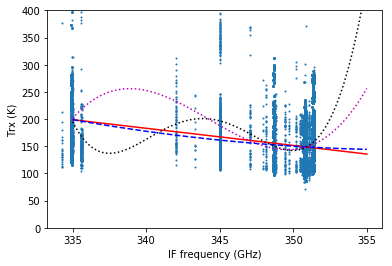

In [26]:
plt.plot(HLSB.lofreq, HLSB.trx,'o', markersize=1)
plt.ylim(0,400)
plt.xlabel("IF frequency (GHz)")
plt.ylabel("Trx (K)")
xp=np.linspace(335, 355, 100)
plt.plot(xp, np.polyval(p1, xp),'r-')
plt.plot(xp, np.polyval(p2, xp),'b--')
plt.plot(xp, np.polyval(p3, xp),'m:')
plt.plot(xp, np.polyval(p4, xp),'k:')

In [27]:
min(HLSB.utc), max(HLSB.utc)

('2018-01-04 11:16:35.459840', '2018-09-04 15:10:24.288320')